# Lectura de datos de precipitación y gráfica de distribución temporal de datos

In [46]:
# Librerías importadas
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lectura de datos

In [49]:
def LeerArchivos():
    # Crear una ventana raíz
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Abrir un cuadro de diálogo para seleccionar un archivo CSV
    file_path = filedialog.askopenfilename(
        title="Selecciona un archivo CSV",
        filetypes=(("CSV files", "*.csv"), ("Todos los archivos", "*.*"))
    )

    # Mostrar la ruta del archivo seleccionado
    print(f"Archivo seleccionado: {file_path}")

    # Cerrar la ventana raíz
    root.destroy()
        
    if file_path:  # Verificar si se seleccionó un archivo
        try:
            df = pd.read_csv(file_path)
        except Exception as e:
            print(f"Error al leer el archivo: {e}")
    else:
        print("No se seleccionó ningún archivo.")
            
    # Unir el código y nombre de las estaciones
    df['CODIGO_NOMBRE'] = df['CODIGO'] + ',' + df['NOMBRE']
    column_names = df['CODIGO_NOMBRE'].unique()
    
    # Transponer los datos y crear un nuevo DataFrame
    new_df = df.iloc[:, :-1].T
    new_df.columns = column_names
    
    return new_df

## Gráfica de distribución temporal

In [52]:
def grafica():
    
    DatosInt = new_df.iloc[6:, :].notnull().astype(int)
    DatosInt = DatosInt.replace(0, np.nan)
    DatosInt.index = pd.to_datetime(DatosInt.index)
    
    for i in range(1,DatosInt.shape[1]):
        plt.plot(DatosInt.index, DatosInt.iloc[:,i]*i,
                 label = DatosInt.iloc[:,i].name,linewidth = 5)
    
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
        plt.grid(axis='x', which='both', linestyle='--', linewidth=0.7)

## Ejecución del código para datos PAPALLACTA

Archivo seleccionado: C:/Users/juanj/OneDrive/Documentos/FONAG/Datos_Históricos_Precipitación_2008-2023/Prec_Diaria_Cruda_Papallacta.csv


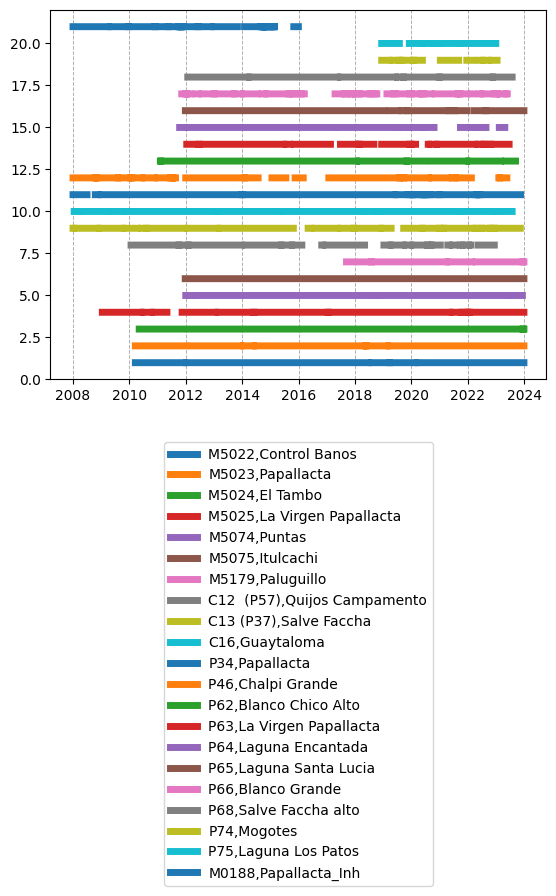

In [55]:
# Almacernar los datos leidos en la variable "Datos"
Papallacta = new_df = LeerArchivos()

# Llamar a la función grafica
grafica()

## Ejecución del código para datos PITA

Archivo seleccionado: C:/Users/juanj/OneDrive/Documentos/FONAG/Datos_Históricos_Precipitación_2008-2023/Prec_Diaria_Cruda_Pita.csv


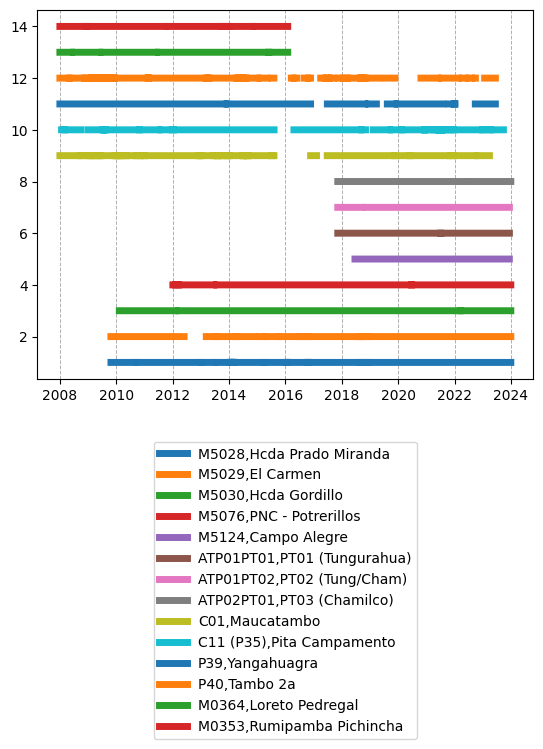

In [58]:
# Almacernar los datos leidos en la variable "Datos"
Papallacta = new_df = LeerArchivos()

# Llamar a la función gráfica
grafica()